In [1]:
#!pip install shap
#!pip install sklearn
import pandas as pd
import numpy as np
import shap
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
df = pd.read_csv("./use_data/user_info_format1[161-320].csv")
df = df.drop('user_id', axis=1)
df_female = df.loc[df['gender'] == 0].drop(['gender'], axis=1).to_numpy()
df_male = df.loc[df['gender'] == 1].drop(['gender'], axis=1).to_numpy()
df_age_1 = df.loc[df['age_range'] == 1.0].drop(['age_range'], axis=1).to_numpy()
df_age_2 = df.loc[df['age_range'] == 2.0].drop(['age_range'], axis=1).to_numpy()
df_age_3 = df.loc[df['age_range'] == 3.0].drop(['age_range'], axis=1).to_numpy()
df_age_4 = df.loc[df['age_range'] == 4.0].drop(['age_range'], axis=1).to_numpy()
df_age_5 = df.loc[df['age_range'] == 5.0].drop(['age_range'], axis=1).to_numpy()
df_age_6 = df.loc[df['age_range'] == 6.0].drop(['age_range'], axis=1).to_numpy()
df_age_7 = df.loc[df['age_range'] == 7.0]
df_age_8 = df.loc[df['age_range'] == 8.0]
df_age_7 = pd.concat([df_age_7,df_age_8]).drop(['age_range'], axis=1).to_numpy()

df

,age_range,gender
0,5.0,2.0
1,5.0,1.0
2,4.0,0.0
3,6.0,0.0
4,4.0,1.0
...,...,...
3666,3.0,0.0
3667,0.0,0.0
3668,3.0,1.0
3669,0.0,0.0


In [3]:
def count(df):
    keys = np.unique(df)
    count = {}
    for key in keys:
        count[key] = np.count_nonzero(df == key)
    return count

<BarContainer object of 8 artists>

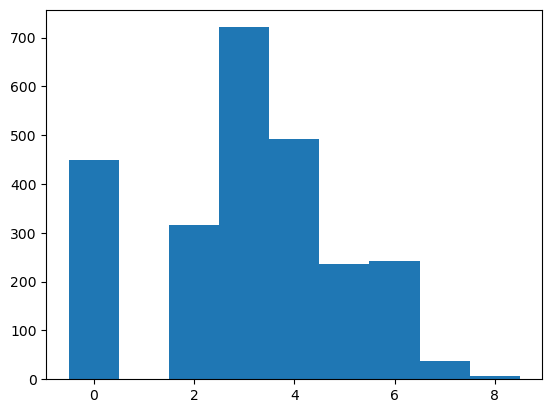

In [4]:
female_count = count(df_female)
plt.bar(female_count.keys(),female_count.values(),width=1)

<BarContainer object of 9 artists>

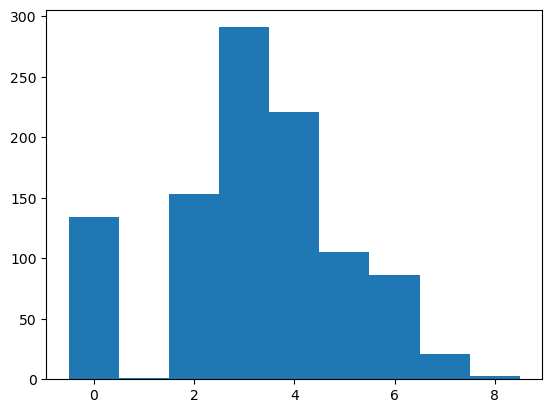

In [5]:
male_count = count(df_male)
plt.bar(male_count.keys(),male_count.values(),width=1)

<BarContainer object of 1 artists>

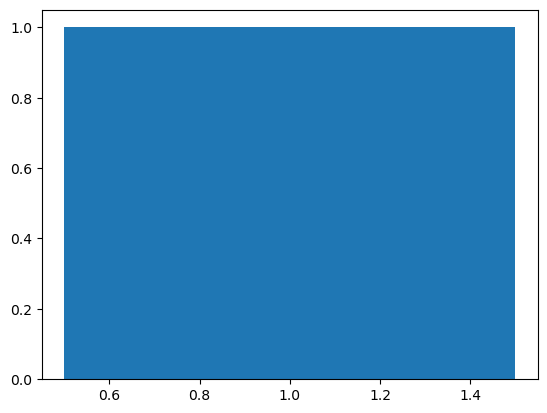

In [6]:
df_age_1 = count(df_age_1)
plt.bar(df_age_1.keys(),df_age_1.values(),width=1)

<BarContainer object of 4 artists>

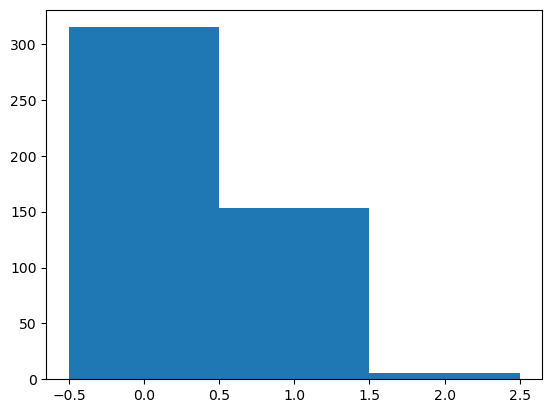

In [7]:
df_age_2 = count(df_age_2)
plt.bar(df_age_2.keys(),df_age_2.values(),width=1)

<BarContainer object of 4 artists>

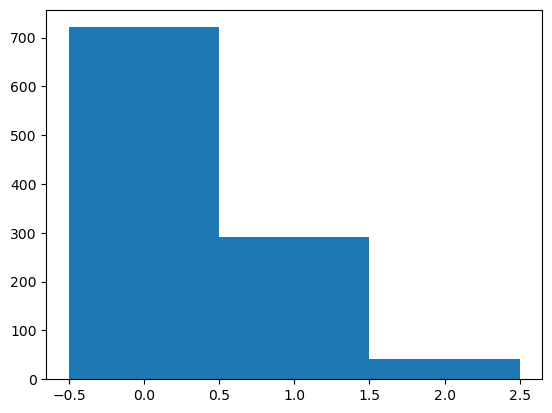

In [8]:
df_age_3 = count(df_age_3)
plt.bar(df_age_3.keys(),df_age_3.values(),width=1)

<BarContainer object of 3 artists>

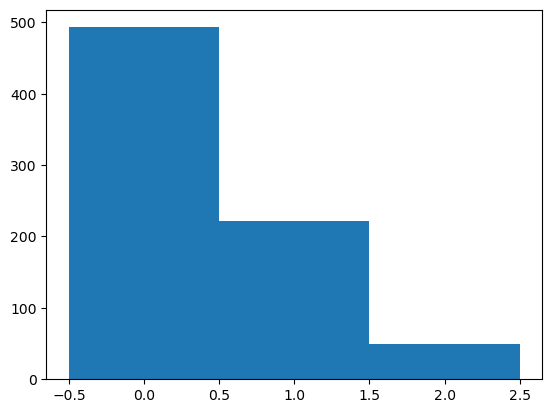

In [9]:
df_age_4 = count(df_age_4)
plt.bar(df_age_4.keys(),df_age_4.values(),width=1)

<BarContainer object of 3 artists>

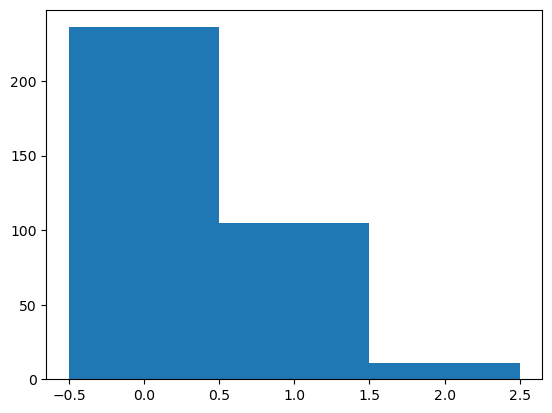

In [10]:
df_age_5 = count(df_age_5)
plt.bar(df_age_5.keys(),df_age_5.values(),width=1)

<BarContainer object of 4 artists>

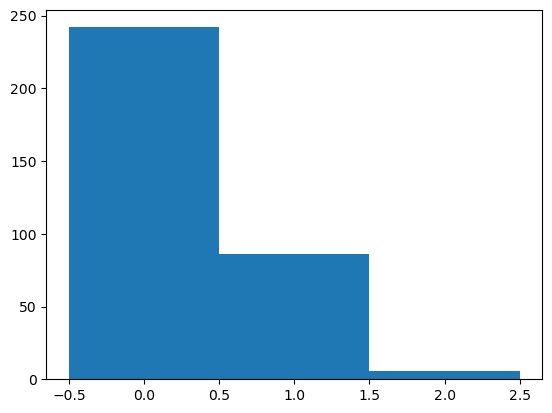

In [11]:
df_age_6 = count(df_age_6)
plt.bar(df_age_6.keys(),df_age_6.values(),width=1)

<BarContainer object of 3 artists>

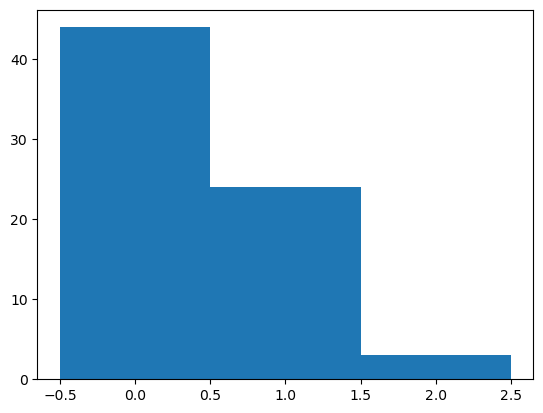

In [12]:
df_age_7 = count(df_age_7)
plt.bar(df_age_7.keys(),df_age_7.values(),width=1)

In [17]:
df2 = pd.read_csv("./use_data/user_log_format1[161-320].csv")
df2

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,149002,282,885,3791,1500.0,1111,0
1,149002,282,885,3791,1500.0,1107,0
2,109881,230,629,1,1662.0,820,0
3,109881,230,629,1,1662.0,820,0
4,109881,230,629,1,1662.0,820,0
...,...,...,...,...,...,...,...
6544,73105,259,614,637,2603.0,1111,0
6545,403421,175,1181,4760,247.0,1111,0
6546,116738,186,267,1200,2276.0,1110,0
6547,116738,186,267,1200,2276.0,1101,0


<BarContainer object of 3671 artists>

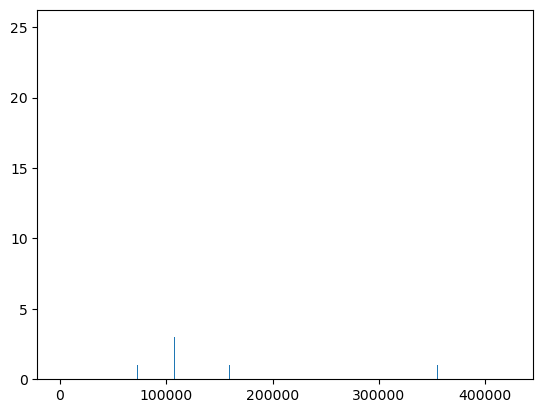

In [19]:
df2['user_id'].plot(kind="hist")

<BarContainer object of 155 artists>

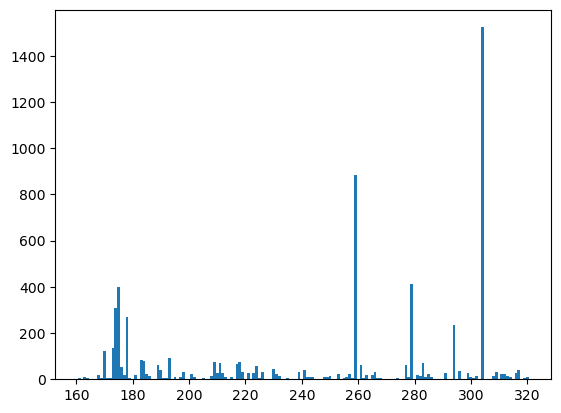

In [20]:
item_id = df2['item_id']
item_id.to_numpy()
item_id_count = count(item_id)
plt.bar(item_id_count.keys(),item_id_count.values(),width=1)

<BarContainer object of 88 artists>

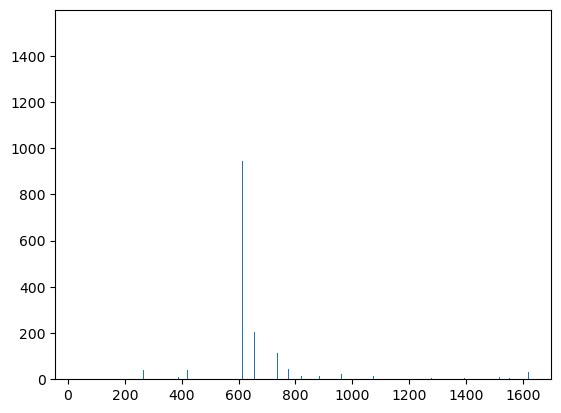

In [22]:
cat_id = df2['cat_id']
cat_id.to_numpy()
cat_id_count = count(cat_id)
plt.bar(cat_id_count.keys(),cat_id_count.values(),width=1)

<BarContainer object of 149 artists>

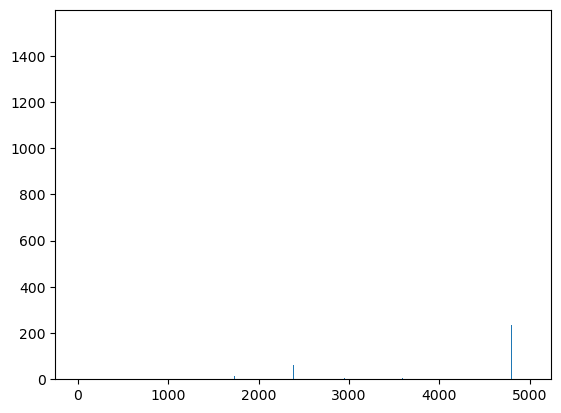

In [23]:
seller_id = df2['seller_id']
seller_id.to_numpy()
seller_id_count = count(seller_id)
plt.bar(seller_id_count.keys(),seller_id_count.values(),width=1)

<BarContainer object of 151 artists>

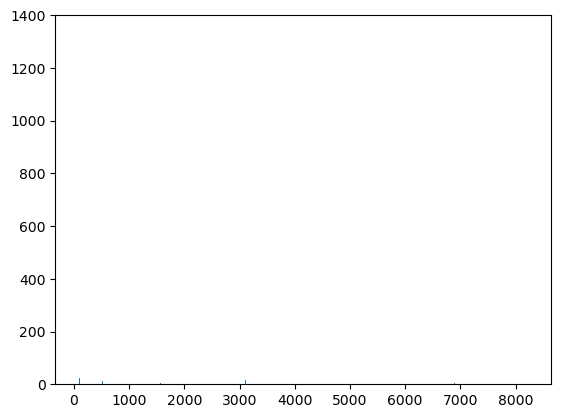

In [24]:
brand_id = df2['brand_id']
brand_id.to_numpy()
brand_id_count = count(brand_id)
plt.bar(brand_id_count.keys(),brand_id_count.values(),width=1)

<BarContainer object of 3671 artists>

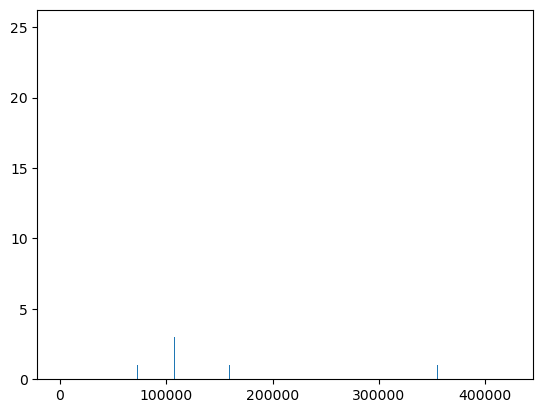

In [25]:
action_type = df2['action_type']
action_type.to_numpy()
action_type_count = count(user_id)
plt.bar(action_type_count.keys(),action_type_count.values(),width=1)

<BarContainer object of 184 artists>

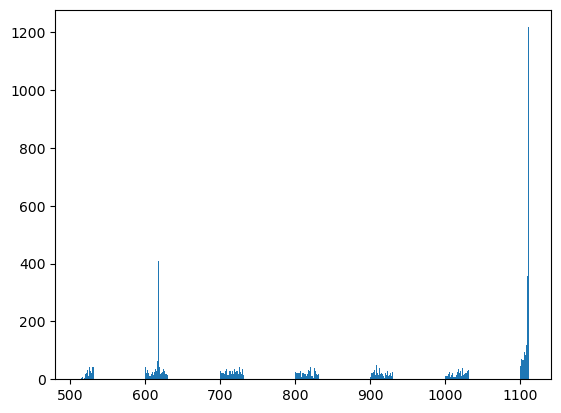

In [21]:
time_stamp = df2['time_stamp']
time_stamp.to_numpy()
time_stamp_count = count(time_stamp)
plt.bar(time_stamp_count.keys(),time_stamp_count.values(),width=1)